In [3]:
import pandas as pd
import itertools 
import collections
import matplotlib.pyplot as plt

In [4]:
job_skills = pd.read_csv("csv/job_skills.csv")

In [5]:
job_skills

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


In [6]:
job_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


In [7]:
missing_values = job_skills.isnull().sum()
missing_values

job_link         0
job_skills    2085
dtype: int64

In [8]:
rows_with_missing_values = job_skills[job_skills.isnull().any(axis=1)]
rows_with_missing_values

,job_link,job_skills
4123,https://www.linkedin.com/jobs/view/sales-couns...,NaN
5250,https://www.linkedin.com/jobs/view/hospice-cha...,NaN
6526,https://www.linkedin.com/jobs/view/beverage-ha...,NaN
8206,https://uk.linkedin.com/jobs/view/health-safet...,NaN
8454,https://www.linkedin.com/jobs/view/rehabilitat...,NaN
...,...,...
1293986,https://www.linkedin.com/jobs/view/roman-catho...,NaN
1294265,https://www.linkedin.com/jobs/view/supervising...,NaN
1294324,https://au.linkedin.com/jobs/view/disability-s...,NaN
1295019,https://www.linkedin.com/jobs/view/community-l...,NaN


In [9]:
job_skills = job_skills.dropna()

In [10]:
duplicate_rows = job_skills.duplicated().sum()
duplicate_rows

0

In [11]:
job_skills = job_skills.drop_duplicates()

In [12]:
job_skills["job_skills"] = job_skills["job_skills"].str.split(", ")

In [13]:
skills_count = {}

for skills_list in job_skills["job_skills"]:
    for skill in skills_list:
        if skill in skills_count:
            skills_count[skill] += 1
        else:
            skills_count[skill] = 1

skills_df = pd.DataFrame(
    list(skills_count.items()), columns=["Skill", "Count"]
).sort_values(by='Count', ascending=False)

In [14]:
skills_df.head(20)

,Skill,Count
23,Communication,368293
27,Teamwork,226266
25,Leadership,184341
14,Customer service,166209
91,Communication skills,116260
111,Customer Service,110418
211,Problem Solving,102046
22,Sales,92766
24,Problemsolving,92512
710,Nursing,87484


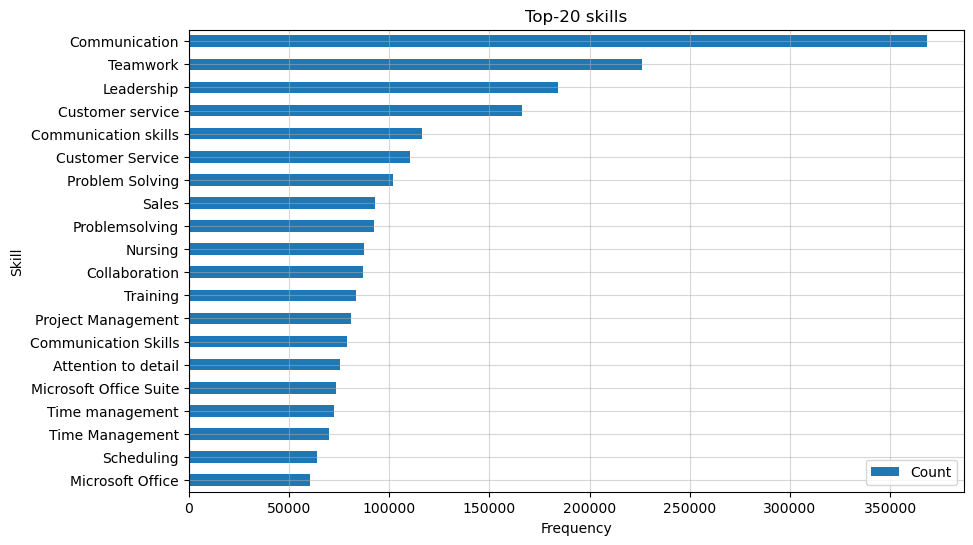

In [15]:
top20_skills = skills_df.head(20).sort_values(by="Count", ascending=True)

top20_skills.plot(kind="barh", figsize=(10, 6))

plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.title("Top-20 skills")
plt.grid(linestyle="-", alpha=0.5)
plt.yticks(range(len(top20_skills)), top20_skills.Skill)
plt.show()

In [ ]:
skill_combinations = []
for skills_list in job_skills["job_skills"]:
    skill_combinations.extend(
        itertools.combinations(skills_list, 2)
    )  

skill_combinations_count = collections.Counter(skill_combinations)

correlation_df = pd.DataFrame(
    list(skill_combinations_count.items()), columns=["Combinations", "Frequency"]
).sort_values(by="Frequency", ascending=False)

In [ ]:
correlation_df.head(20)

,Combinations,Frequency
220,"(Communication, Teamwork)",110753
7717,"(Leadership, Communication)",65305
99,"(Customer service, Communication)",61526
218,"(Communication, Leadership)",55471
217,"(Communication, Problemsolving)",53571
8875,"(Communication, Problem Solving)",51817
103,"(Customer service, Teamwork)",48308
207,"(Sales, Communication)",42759
235,"(Leadership, Teamwork)",39452
7726,"(Customer Service, Communication)",38749


In [18]:
job_skills['job_title'] = job_skills['job_link'].str.extract(r'/([^/]+)-at')
job_skills['job_title'] = job_skills['job_title'].str.replace('-', ' ').str.title()
job_skills = job_skills.dropna()

In [19]:
fb_vacs = job_skills[job_skills['job_title'].str.lower().str.contains('frontend|backend')]

In [20]:
fb_vacs

,job_link,job_skills,job_title
10312,https://uk.linkedin.com/jobs/view/java-backend...,"[NodeJS, Kubernetes, Amazon Elastic Container ...",Java Backend Developer
17668,https://www.linkedin.com/jobs/view/senior-back...,"[Golang, Typescript, React, CircleCI, GitHub A...",Senior Backend Engineer
18721,https://uk.linkedin.com/jobs/view/senior-backe...,"[Python, Django, PostgreSQL, React, AWS, Golan...",Senior Backend Engineer
19774,https://uk.linkedin.com/jobs/view/volunteer-gr...,"[Graphic Design, Photoshop, InDesign, UI/UX De...",Volunteer Graphic Design Designer Front End De...
20712,https://uk.linkedin.com/jobs/view/frontend-dev...,"[React, Node.js, Software Development, Scalabl...",Frontend Developer
...,...,...,...
1293697,https://www.linkedin.com/jobs/view/backend-arc...,"[Java, Spring Boot, Spring Cloud, RESTful APIs...",Backend Architect
1295003,https://www.linkedin.com/jobs/view/sr-backend-...,"[ReactJS, Java, Python, AWS, Agile methodologi...",Sr Backend Software Engineer Trading Oms
1295324,https://www.linkedin.com/jobs/view/founding-ba...,"[Typescript, NodeJS, RESTful APIs, DevOps, Fro...",Founding Backend Engineer
1296029,https://uk.linkedin.com/jobs/view/backend-soft...,"[Python, Programming languages, Product shippi...",Backend Software Engineer


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def getVacancyName(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            title_element = soup.find("h1", class_="top-card-layout__title")
            if title_element:
                return title_element.get_text(strip=True)
            else:
                return None
        else:
            return None
    except Exception as e:
        print("Loading error", e)
        return None


# Создание столбца Vacancy_name
job_skills['Vacancy_name'] = job_skills['job_link'].head(100).apply(getVacancyName)

In [ ]:
job_skills